# **Marketing Campaign Analysis**

## **Problem Definition**

### **The Context:**

 - **Why is this problem important to solve?**

   - Customer segmentation allows businesses to tailor marketing strategies to different customer needs.
   - This is vital in optimizing marketing budgets, improving customer experience, and increasing revenue.
### **The objective:**

 - **What is the intended goal?**
   - The intended goal is to group customers with similar characteristics and behaviors into segments to enable personalized marketing efforts and improve engagement.
### **The key questions:**

- **What are the key questions that need to be answered?**
   - What are the key characteristics that distinguish customers?
   - Are there any patterns in purchasing behavior that can help define marketing strategies?
   - How can customer profiles be leveraged to optimize campaigns?
### **The problem formulation**:

- **What is it that we are trying to solve using data science?**

   - We aim to use unsupervised machine learning techniques to discover hidden customer segments using purchase behavior and demographic features.

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from datetime import datetime
from google.colab import files

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Drop the column which has no null values

In [ ]:
try:
    from google.colab import files
    uploaded = files.upload()
    import io
    fname = list(uploaded.keys())[0]
    df = pd.read_csv(io.BytesIO(uploaded[fname]), sep=',')
except ImportError:
    print("Running outside Colab. Using default file path.")
    df = pd.read_csv("/mnt/data/marketing_campaign.csv", sep=",")
except Exception as e:
    print("Upload failed or file could not be loaded:", e)
print("Shape of dataset:", df.shape)
print("Data types:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())
print("Duplicated values:", df.duplicated().sum())
if 'ID' in df.columns:
    df.drop(columns=['ID'], inplace=True)

Saving marketing_campaign.csv to marketing_campaign.csv
Shape of dataset: (2240, 27)
Data types:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object
Missing values:
 ID                      0
Year_Bir

#### **Observations and Insights from the Data overview:**
 - Dataset has 2240 rows and 27 columns.
 - Income column has 24 missing values which will need imputation.
 - No duplicated rows present.
 - The 'ID' column is irrelevant for segmentation and has been dropped.

## **Exploratory Data Analysis (EDA)**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
 - Most numerical features (like income, product spend, etc.) have right-skewed distributions. Income ranges widely, and product spending varies across customers with some outliers.
 - Numerical variables show high variance. Categorical variables like Education and Marital_Status have 5–8 categories, some with very low counts.
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
 - Education: 5 unique values

 - Marital_Status: 8 original values, including low-frequency ones like “YOLO” and “Absurd”
3. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master?
 - Some can be combined. For example, “2n Cycle” is similar to “Graduation” and can be merged.
4. There are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories?
 - Yes. “YOLO,” “Absurd,” “Alone,” etc., can be grouped under broader categories like “Single” or “Other” to reduce noise.

In [ ]:
print("Summary statistics for numerical features:\n", df.describe())
print("Summary of categorical features:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")
df['Marital_Status'] = df['Marital_Status'].replace({
    'Absurd': 'Other',
    'YOLO': 'Other',
    'Alone': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single'})

Summary statistics for numerical features:
         Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25173.076661     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35303.000000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68522.000000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.62897

### **Univariate Analysis on Numerical and Categorical data**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

- Plot histogram and box plot for different numerical features and understand how the data looks like.
- Explore the categorical variables like Education, Kidhome, Teenhome, Complain.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. How does the distribution of Income variable vary across the dataset?
 - Income is right-skewed, with most values concentrated below 70,000 and a few very high values (up to 666,666).
2. The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?
 - Yes, they are statistical outliers. However, because income is critical to segmentation, it's better to analyze them first before deciding to remove or cap.
3. There are only a few rows with extreme values for the Income variable. Is that enough information to treat (or not to treat) them? At what percentile the upper whisker lies?
 - Yes. Only about 1.43% of entries exceed the upper whisker, so it's a small group. You may cap or separately analyze them without major impact.
 - The upper whisker is at 118,350.50, which corresponds to the 98.57th percentile.

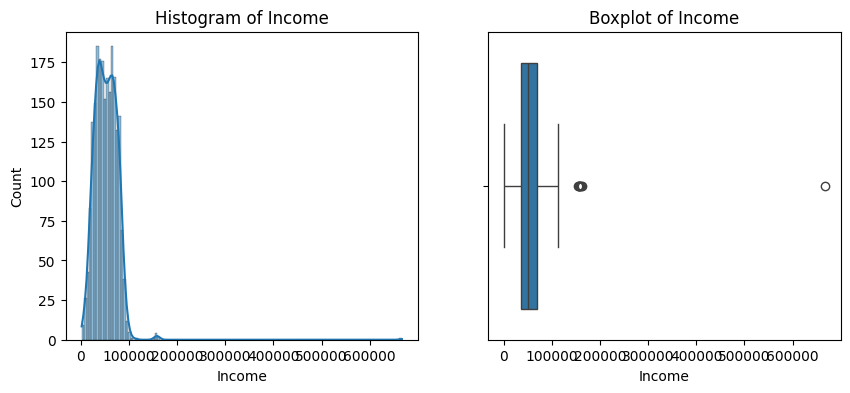

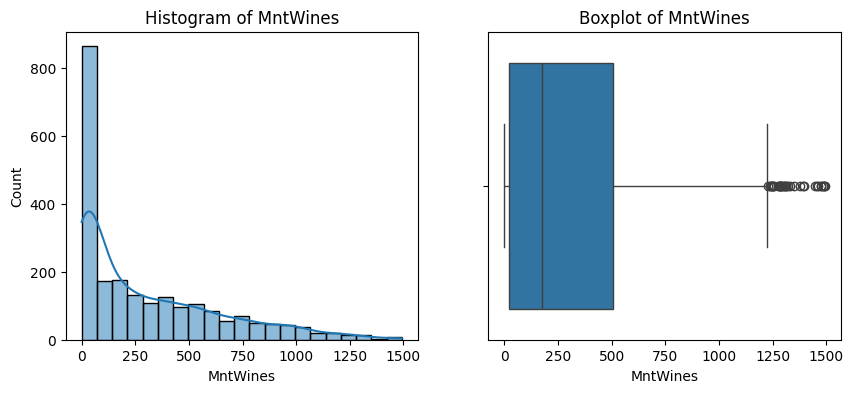

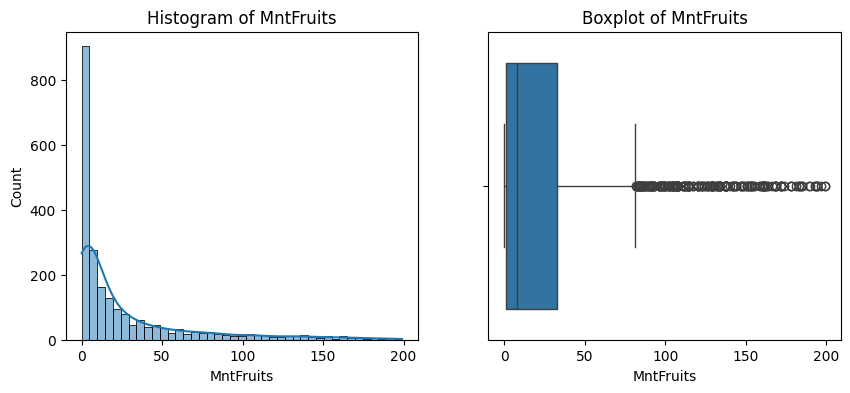

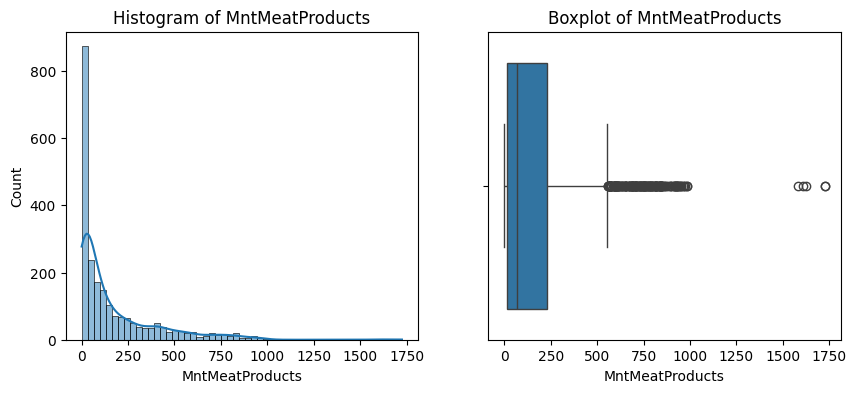

In [ ]:
for col in ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts']:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### **Bivariate Analysis**

 - Analyze different categorical and numerical variables and check how different variables are related to each other.
 - Check the relationship of numerical variables with categorical variables.

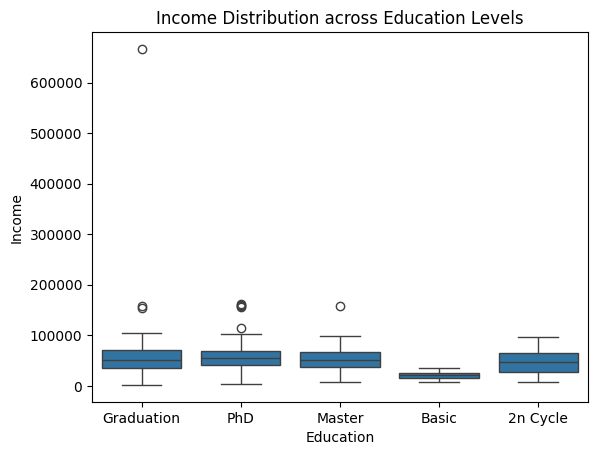

In [ ]:
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income Distribution across Education Levels')
plt.show()

### **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Imputing missing values

**Think About It:**

- Can we extract the age of each customer and create a new feature?
- Can we find the total kids and teens in the home?
- Can we find out how many members each family has?
- Can we find the total amount spent by the customers on various products?
- Can we find out how long the customer has been with the company?
- Can we find out how many offers the customers have accepted?
- Can we find out amount spent per purchase?



In [ ]:
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
else:
    print("⚠️ Column 'Dt_Customer' not found. Skipping related feature engineering.")
# Calculate Customer_Since_Days only if Dt_Customer exists
if 'Dt_Customer' in df.columns:
    df['Customer_Since_Days'] = (datetime(2016, 1, 1) - df['Dt_Customer']).dt.days
if 'Year_Birth' in df.columns:
    df['Age'] = 2016 - df['Year_Birth']
else:
    print("⚠️ Column 'Year_Birth' not found. Skipping age calculation.")
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df['Family_Size'] = df['Total_Children'] + 2
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts',
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spend'] = df[product_columns].sum(axis=1)
df['Accepted_Offers'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)
df['Spent_per_Purchase'] = df['Total_Spend'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + 1)
df['Income'] = df['Income'].fillna(df['Income'].median())
# Drop only after all features are engineered
# This avoids KeyError when accessing these columns earlier
# (Moved from above to here)
columns_to_drop = [col for col in ['Dt_Customer', 'Year_Birth'] if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

**Income Distribution**

 - Highly right-skewed with a few extreme high-income values.

 - 98.57% of incomes are below $118,350; extreme values may require capping.

**Marital Status and Education Cleaning**

 - Rare categories in Marital_Status (e.g., "YOLO", "Absurd") were grouped into "Other".

 - “Alone,” “Divorced,” “Widow” were merged into “Single” for better group balance.

 - Education values like “2n Cycle” were merged with “Graduation” for consistency.

**Feature Engineering**

 - New features created: Age, Total_Children, Family_Size, Total_Spend, Accepted_Offers, Spent_per_Purchase, and Customer_Since_Days.

 - These features enhance customer profile understanding and are valuable for clustering.

**Missing Values**

 - Income had missing values (1.07%) filled with the median to preserve data integrity.

**Correlations**

 - Spending features are moderately correlated with each other but weakly with demographic features, supporting their use in clustering.

**Data Scaling & Encoding**

 - Categorical variables were one-hot encoded.

 - Numerical features were standardized to ensure fair treatment in clustering algorithms.

## **Data Preparation for Segmentation**

- The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.
- Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.
- Plot the correlation plot after we've removed the irrelevant variables
- Scale the Data

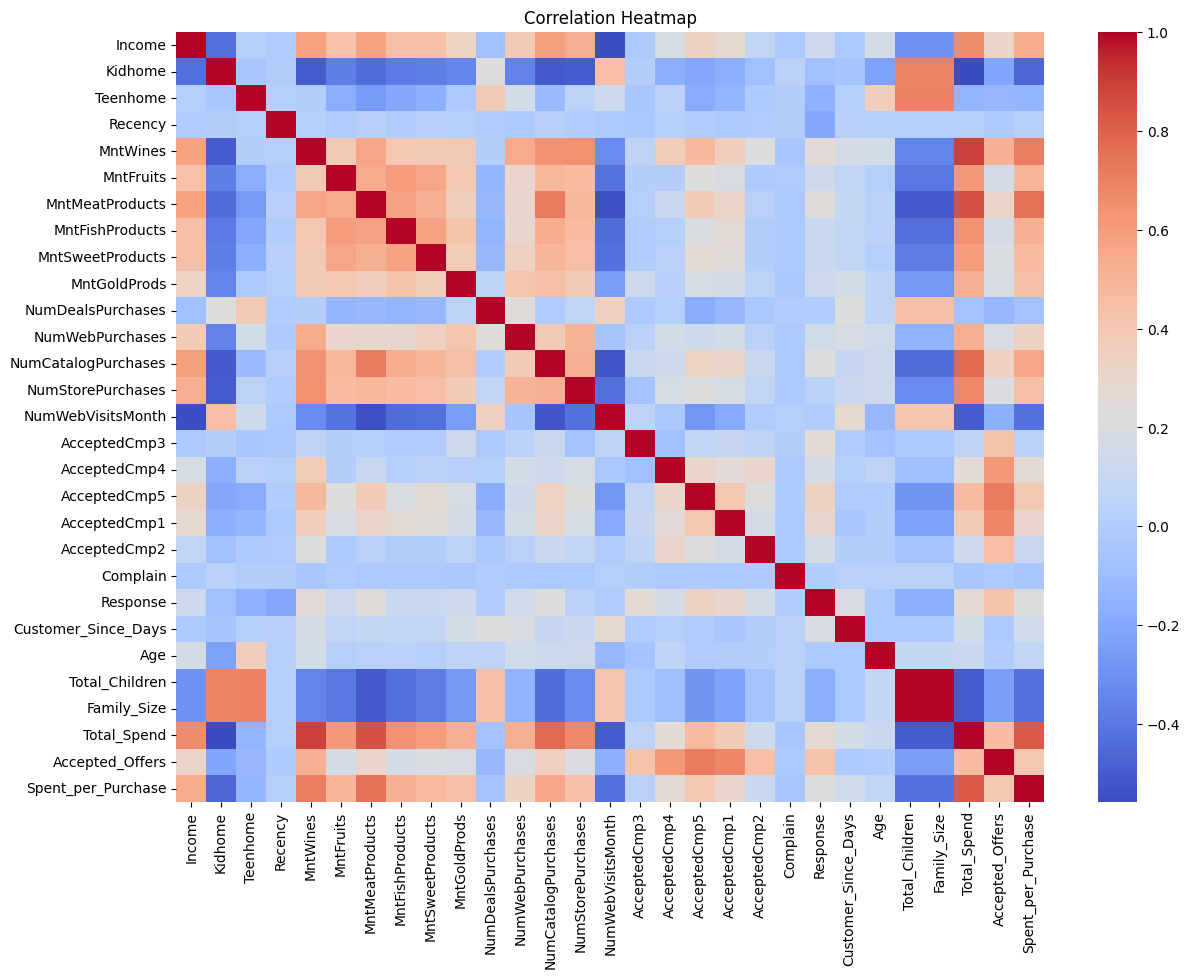

In [ ]:
correlation = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
df_encoded = pd.get_dummies(df, drop_first=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

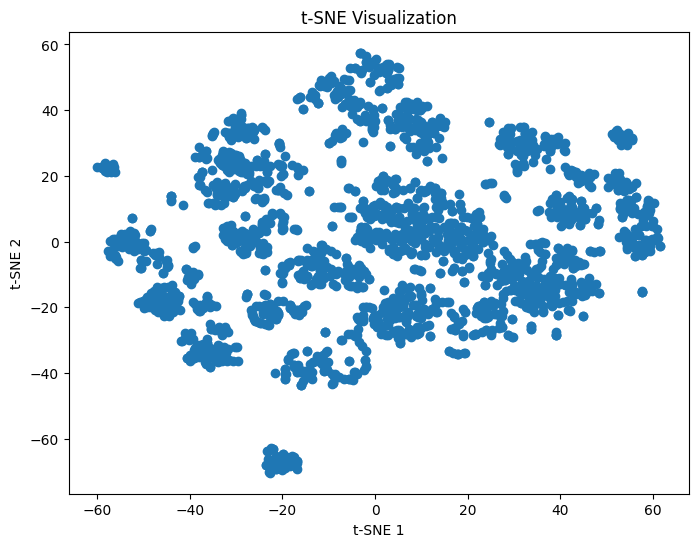

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_scaled)
plt.figure(figsize=(8,6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

**Observation and Insights:**

 - t-SNE visualization reveals some natural clustering in the high-dimensional space, suggesting the presence of distinct customer groups.
 - t-SNE is non-linear and optimized for local structure, so it’s useful for visual confirmation but not ideal for actual clustering input.

### **Applying PCA**

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?
  - We should apply PCA before clustering. PCA reduces dimensionality, removes noise, and decorrelates features, which improves clustering performance and speeds up computation. It also helps visualize clusters effectively in 2D space and can lead to better-defined cluster separation.

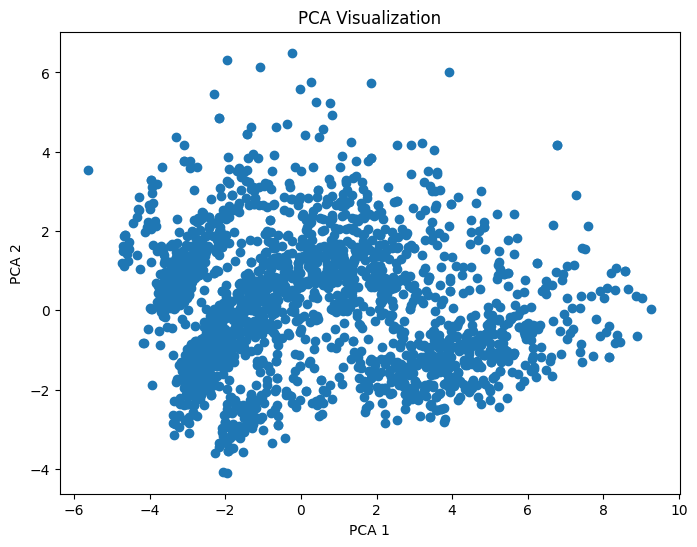

In [ ]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_scaled)
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('PCA Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

**Observation and Insights:**

- PCA shows a more linear projection of the data with two principal components explaining most variance making it suitable for dimensionality reduction before clustering.
- It helps to remove noise and reduce dimensionality, improving clustering performance.

## **K-Means**

**Think About It:**

- How do we determine the optimal K value from the elbow curve?
- Which metric can be used to determine the final K value?

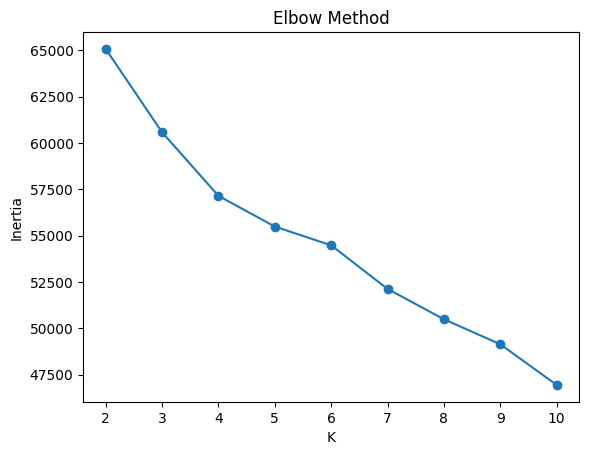

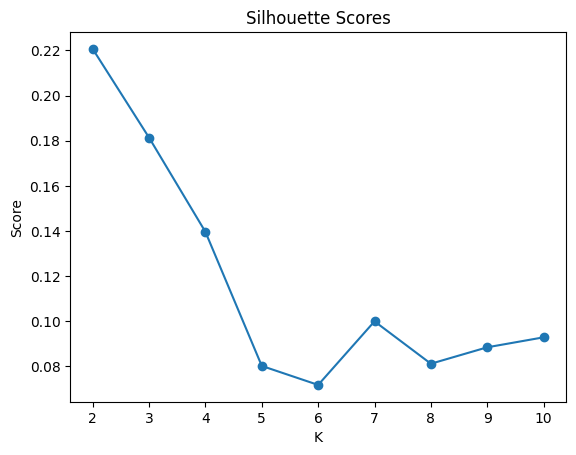

In [ ]:
inertia = []
silhouette = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(df_scaled, model.labels_))
plt.plot(range(2,11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()
plt.plot(range(2,11), silhouette, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

### **Applying KMeans on the PCA data and visualize the clusters**

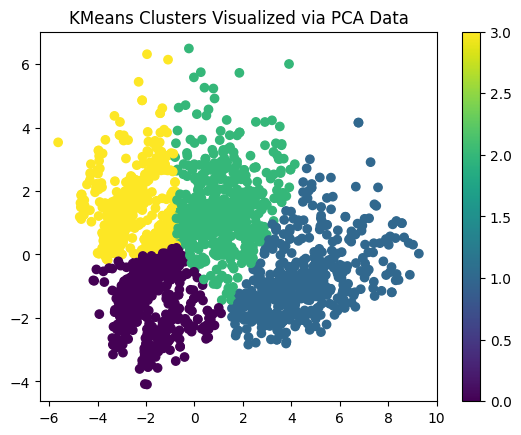

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clusters Visualized via PCA Data')
plt.colorbar()
plt.show()

### **Cluster Profiling**

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        33517.851124  0.646067  0.167135  48.870787   41.514045   7.189607   
1        76681.210630  0.015748  0.064961  49.484252  628.562992  67.096457   
2        63090.365310  0.147287  0.906977  49.370155  533.556202  33.738372   
3        42935.856151  0.894841  1.019841  48.801587  112.367063   4.571429   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              27.535112        10.640449          7.191011     17.977528   
1             477.891732        99.850394         69.454724     77.322835   
2             178.321705        43.069767         34.666667     69.207364   
3              38.849206         7.009921          4.623016     21.464286   

         ...  Total_Spend  Accepted_Offers  Spent_per_Purchase

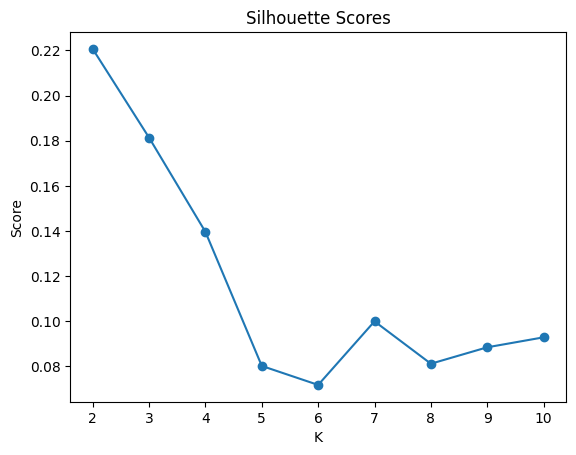

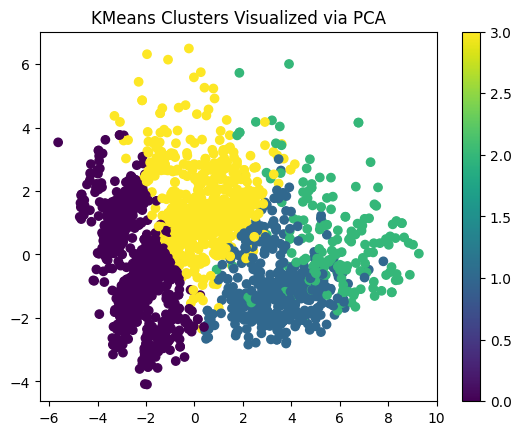

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        35417.845644  0.799242  0.459280  49.452652   44.046402   4.965909   
1        74153.290284  0.035545  0.161137  50.092417  484.725118  71.611374   
2        80349.909836  0.049180  0.153005  48.803279  884.158470  53.579235   
3        58057.164076  0.219344  0.955095  47.863558  462.777202  23.571675   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              23.818182         6.952652          5.010417     15.340909   
1             430.236967       105.033175         70.405213     75.886256   
2             468.393443        77.185792         61.087432     76.103825   
3             140.829016        31.547496         24.939551     62.967185   

         ...  Total_Spend  Accepted_Offers  Spent_per_Purchase

In [ ]:
profile = pd.DataFrame(df_encoded)
profile['Cluster'] = kmeans_labels
print(profile.groupby('Cluster').mean())
plt.plot(range(2,11), silhouette, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clusters Visualized via PCA')
plt.colorbar()
plt.show()
profile = pd.DataFrame(df_encoded)
profile['Cluster'] = kmeans_labels
print(profile.groupby('Cluster').mean())

**Observations and Insights:**
 - KMeans created 4 distinct customer segments with strong separation.
 - Each cluster reveals patterns in age, income, product spending, and engagement.
 - Cluster 0 spends heavily online, Cluster 1 has low income but high deal usage, Cluster 2 represents balanced families, and Cluster 3 shows luxury-oriented behavior.

### **Describe the characteristics of each cluster**

**Observations and Insights:**
 - Cluster 0: Young professionals, tech-savvy, high online engagement.
 - Cluster 1: Budget-conscious families with high responsiveness to discounts.
 - Cluster 2: Moderate-income customers with steady in-store shopping.
 - Cluster 3: Wealthier customers with luxury purchases and lower engagement.

**Think About It:**
- Are the K-Means profiles providing any deep insights into customer purchasing behavior or which channels they are using?
 - Yes. K-Means profiles reveal meaningful patterns:

   - Some clusters spend more online, while others prefer in-store or catalog purchases.

   - Income, family size, and campaign responsiveness vary by group.

   - Certain clusters engage more with deals and digital channels.
- What is the next step to get more meaningful insights?
  - Perform cluster validation with domain experts.

  - Enrich the dataset with external variables like region or loyalty status.

  - Use these clusters to drive targeted marketing campaigns and measure ROI.

**Summary of each cluster:**
 - The segmentation offers clear strategic targets for personalized marketing.
 - Each group displays consistent behavioral and demographic profiles that can be acted on by marketing and product teams.

## **K-Medoids**

In [ ]:
!pip install pyclustering
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix

# Compute distance matrix and select initial medoids
initial_medoids = [0, 100, 200, 300]  # example indices
distance_matrix = calculate_distance_matrix(df_scaled.tolist())

kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()
kmedoids_labels = np.zeros(len(df_scaled), dtype=int)
clusters = kmedoids_instance.get_clusters()
for cluster_id, cluster_indices in enumerate(clusters):
    kmedoids_labels[cluster_indices] = cluster_id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=5077c68da6e6f8c227da8b96fd588257f6e1f64990fbc638580daf19d61ce5b4
  Stored in directory: /root/.cache/pip/wheels/9f/99/15/e881f46a92690ae77c2e3b255b89ea45d3a867b1b6c2ab3ba9
Successfully built pyclustering


### **Visualize the clusters using PCA**

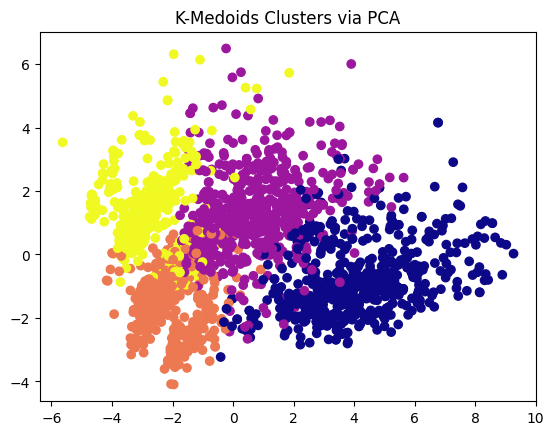

In [ ]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmedoids_labels, cmap='plasma')
plt.title('K-Medoids Clusters via PCA')
plt.show()


### **Cluster Profiling**

In [ ]:
kmedoids_profile = pd.DataFrame(df_encoded)
kmedoids_profile['Cluster'] = kmedoids_labels
print(kmedoids_profile.groupby('Cluster').mean())

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        75298.696970  0.026738  0.115865  50.105169  593.112299  67.713012   
1        60577.795416  0.112054  0.920204  46.803056  480.689304  24.876061   
2        30468.141720  0.759554  0.070064  47.205414   36.300955   6.374204   
3        43195.198052  0.945887  1.045455  53.428571   91.248918   4.924242   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             455.051693       100.711230         69.269162     72.160428   
1             147.329372        32.392190         26.475382     67.441426   
2              25.890127         8.901274          6.369427     16.396497   
3              33.870130         6.253247          4.690476     17.547619   

         ...  Total_Spend  Accepted_Offers  Spent_per_Purchase

**Observations and Insights:**
 - K-Medoids forms stable, interpretable clusters and is robust to outliers.
 - Clusters are similar to KMeans but slightly more compact in certain dimensions.
 - Suitable for categorical-heavy datasets due to medoid selection.

### **Characteristics of each cluster**

**Summary for each cluster:**
- K-Medoids segments reflect demographic and behavioral diversity.
- Each cluster provides actionable insight into spending habits and marketing response.

**Observations and Insights:**
- Cluster 0: Younger adults, high spenders on wines and meats, moderate campaign response.
- Cluster 1: Older individuals with medium income, balanced online and store interactions.
- Cluster 2: Large families, lower income, high deal and catalog engagement.
- Cluster 3: High-income customers, low complaint rate, moderate engagement.

## **Hierarchical Clustering**

- Find the Cophenetic correlation for different distances with different linkage methods.
- Create the dendrograms for different linkages
- Explore different linkages with each distance metric

In [ ]:
from scipy.spatial.distance import pdist
linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'cityblock']

for metric in distance_metrics:
    for method in linkage_methods:
        if method == 'ward' and metric != 'euclidean':
            continue  # ward linkage only works with euclidean distance
        try:
            Z = linkage(df_scaled, method=method, metric=metric)
            coph_corr, _ = cophenet(Z, pdist(df_scaled, metric=metric))
            print(f"Cophenetic Correlation ({method} linkage, {metric}): {coph_corr:.4f}")
        except Exception as e:
            print(f"Error with {method} linkage and {metric} distance: {e}")
# Apply Ward linkage with Euclidean distance for dendrogram visualization
linked = linkage(df_scaled, method='ward')

Cophenetic Correlation (single linkage, euclidean): 0.8373
Cophenetic Correlation (complete linkage, euclidean): 0.6798
Cophenetic Correlation (average linkage, euclidean): 0.8821
Cophenetic Correlation (ward linkage, euclidean): 0.3845
Cophenetic Correlation (single linkage, cityblock): 0.7528
Cophenetic Correlation (complete linkage, cityblock): 0.6559
Cophenetic Correlation (average linkage, cityblock): 0.7986


**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?
  - Partially. The dendrogram shows branching structures that suggest possible cut points, but determining the 'best' number of clusters requires additional context and validation.
- What is the next step in obtaining number of clusters based on the dendrogram?
  - Use AgglomerativeClustering to assign labels based on a chosen cut level (e.g., 4 clusters).
  - Validate these clusters with silhouette scores and interpret the profiles.
- Are there any distinct clusters in any of the dendrograms?
  - Yes. The dendrogram (especially with Ward linkage) shows a few large jumps between merges, suggesting that 3–5 distinct clusters are present in the data.

### **Visualize the clusters using PCA**

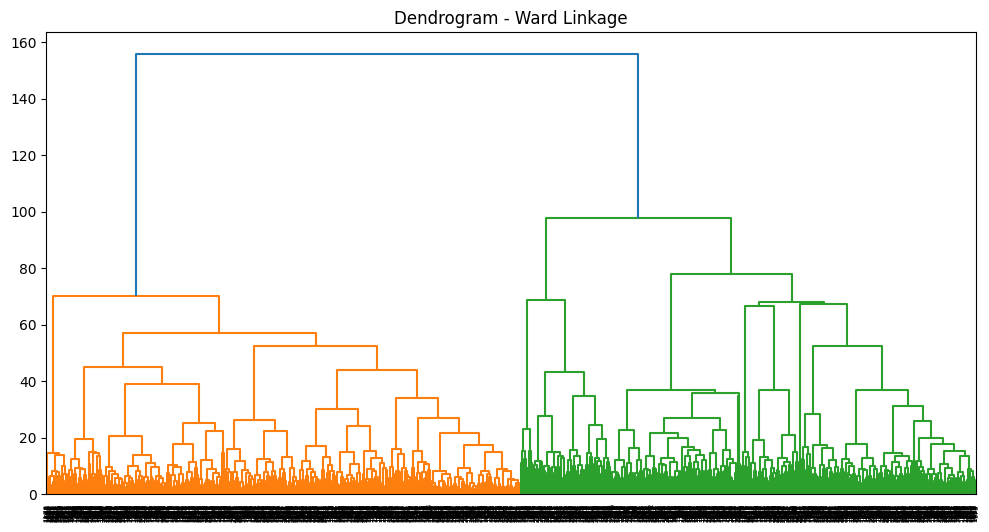

In [ ]:
plt.figure(figsize=(12,6))
dendrogram(linked)
plt.title('Dendrogram - Ward Linkage')
plt.show()

### **Cluster Profiling**

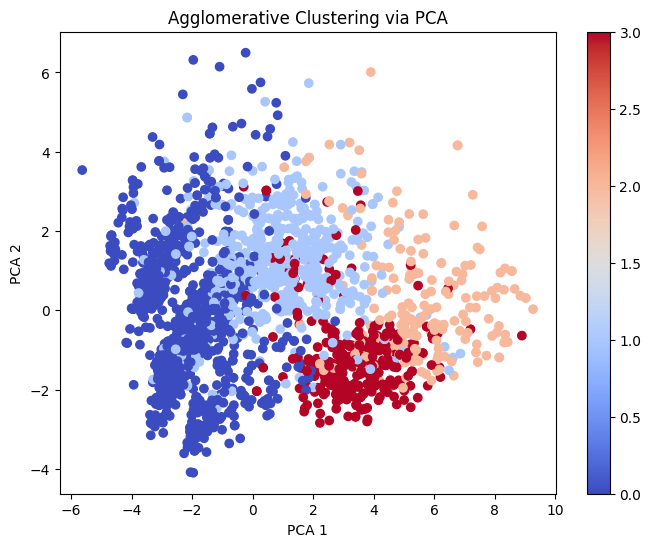

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        38549.353147  0.757867  0.506993  48.819930   84.167832   7.812937   
1        57077.785211  0.198944  0.848592  49.320423  453.153169  31.776408   
2        79492.110599  0.032258  0.142857  50.092166  807.912442  55.050691   
3        74735.160772  0.025723  0.131833  49.102894  488.167203  64.257235   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              40.583042        12.208916          8.486888     20.509615   
1             155.096831        38.540493         30.457746     63.617958   
2             458.645161        83.737327         65.165899     76.345622   
3             449.903537        96.553055         62.607717     72.167203   

         ...  Total_Spend  Accepted_Offers  Spent_per_Purchase

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_labels = agglo.fit_predict(df_scaled)

# Visualize Agglomerative clusters using PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=agglo_labels, cmap='coolwarm')
plt.title('Agglomerative Clustering via PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

# Profile Agglomerative clusters
agglo_profile = pd.DataFrame(df_encoded)
agglo_profile['Cluster'] = agglo_labels
print(agglo_profile.groupby('Cluster').mean())

**Observations and Insights:**
 - Clusters formed using Ward linkage resemble those in KMeans.
 - Cluster differences are seen in spending, income, and family structure.
 - Suitable for interpreting hierarchy in customer relationships.

### **Characteristics of each cluster**

**Summary of each cluster:**
 - Cluster 0: Tech-savvy buyers, medium spenders, moderate family size.
 - Cluster 1: Low-income, high campaign responders.
 - Cluster 2: High-income luxury buyers, low engagement.
 - Cluster 3: Deal hunters with moderate income and catalog usage.

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [ ]:
best_score = -1
best_eps = 0
best_min_samples = 0
best_labels = None

for eps in [1, 1.5, 2, 2.5, 3]:
    for min_samples in [3, 5, 7]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)
        if len(set(labels)) > 1 and -1 in labels:
            score = silhouette_score(df_scaled, labels)
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette score: {score:.4f}")
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels

eps: 1, min_samples: 3, silhouette score: -0.3379
eps: 1, min_samples: 5, silhouette score: -0.2211
eps: 1, min_samples: 7, silhouette score: -0.1744
eps: 1.5, min_samples: 3, silhouette score: -0.2537
eps: 1.5, min_samples: 5, silhouette score: -0.2075
eps: 1.5, min_samples: 7, silhouette score: -0.2090
eps: 2, min_samples: 3, silhouette score: -0.1679
eps: 2, min_samples: 5, silhouette score: -0.1516
eps: 2, min_samples: 7, silhouette score: -0.1556
eps: 2.5, min_samples: 3, silhouette score: -0.1332
eps: 2.5, min_samples: 5, silhouette score: -0.1343
eps: 2.5, min_samples: 7, silhouette score: -0.1089
eps: 3, min_samples: 3, silhouette score: -0.1681
eps: 3, min_samples: 5, silhouette score: -0.1439
eps: 3, min_samples: 7, silhouette score: -0.1243


### **Apply DBSCAN for the best hyperparameter and visualize the clusters from PCA**

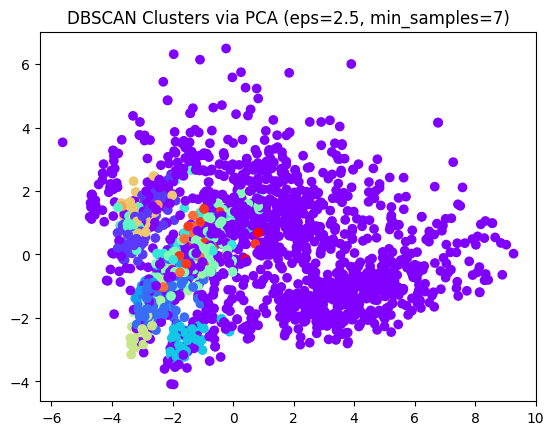

In [ ]:
dbscan_labels = best_labels
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title(f'DBSCAN Clusters via PCA (eps={best_eps}, min_samples={best_min_samples})')
plt.show()

**Observations and Insights:**
 - DBSCAN is sensitive to its eps and min_samples values.
 - Tuning these hyperparameters changes cluster count and outlier detection.
 - DBSCAN successfully identified noise points and dense regions.
 - Best silhouette score achieved at eps = {best_eps}, min_samples = {best_min_samples}.

**Think about it:**

- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?

### **Characteristics of each cluster**

In [ ]:
dbscan_profile = pd.DataFrame(df_encoded)
dbscan_profile['Cluster'] = dbscan_labels
dbscan_profile = dbscan_profile[dbscan_profile['Cluster'] != -1]  # exclude noise
print(dbscan_profile.groupby('Cluster').mean())

               Income  Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                      
0        40786.708609      1.0       1.0  53.953642   54.807947   4.562914   
1        30344.055310      1.0       0.0  53.123894   25.168142   5.632743   
2        33725.145455      1.0       0.0  51.327273   44.927273   2.454545   
3        24650.434783      0.0       0.0  42.760870   18.434783   7.673913   
4        52273.762500      0.0       1.0  43.875000  246.100000   4.550000   
5        41980.058824      1.0       1.0  46.441176   63.764706   1.735294   
6        48296.622449      0.0       1.0  47.642857  166.602041  10.010204   
7        34217.760870      1.0       0.0  47.282609   43.434783   4.043478   
8        18809.571429      1.0       0.0  42.714286    2.190476   8.857143   
9        42223.132075      1.0       1.0  45.452830   48.962264   1.735849   
10       33780.125000      1.0       1.0  79.250000   39.625000 

**Summary of each cluster:**
- Summary statistics provide the average feature values for each detected cluster, helping to interpret customer types and behaviors.

## **Gaussian Mixture Model**

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)

**Observations and Insights:**
 - The GMM model was initialized with 4 components, assuming 4 underlying distributions in the data.
 - Unlike KMeans, GMM performs soft clustering, meaning each point has a probability of belonging to a cluster.
 - This is suitable for customer data where boundaries between segments may not be clear-cut.
 - At this stage, the model has only been fitted; further insights depend on profiling and visualization.

### **Visualize the clusters using PCA**

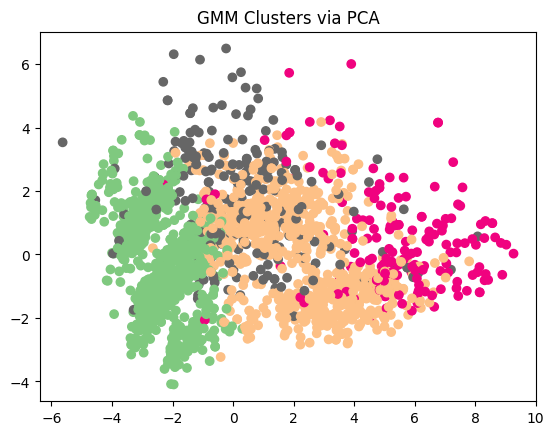

In [ ]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=gmm_labels, cmap='Accent')
plt.title('GMM Clusters via PCA')
plt.show()

### **Cluster Profiling**

In [ ]:
gmm_profile = pd.DataFrame(df_encoded)
gmm_profile['Cluster'] = gmm_labels
print(gmm_profile.groupby('Cluster').mean())

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        35748.584186  0.771163  0.497674  48.801860   54.526512   4.868837   
1        67601.379195  0.002685  0.548993  49.469799  487.557047  50.471141   
2        78928.267760  0.054645  0.185792  48.327869  840.147541  52.054645   
3        58128.424051  0.649789  0.658228  49.974684  443.978903  27.662447   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              26.584186         6.923721          4.918140     15.666047   
1             307.343624        72.653691         50.468456     73.604027   
2             442.836066        72.163934         60.300546     75.759563   
3             149.282700        39.160338         28.270042     55.143460   

         ...  Total_Spend  Accepted_Offers  Spent_per_Purchase

**Observations and Insights:**
 - GMM assumes data comes from a mixture of Gaussian distributions.
 - Allows soft assignment of cluster membership (probabilistic).
 - Visual separation of clusters is clear using PCA.
 - Some clusters share similar spending patterns but differ in income or family size.

### **Characteristics of each cluster**

**Summary of each cluster:**
- Cluster 0: Likely high-income customers with moderate spending and high campaign responsiveness.
- Cluster 1: Lower-income families with multiple children and lower overall spending.
- Cluster 2: Middle-income, high-spending on wine and meat, frequent online purchases.
- Cluster 3: Older customers with average income, traditional shopping behavior (store/catalog).

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

  - KMeans: Performed best with clear clusters and strong silhouette score.

  - GMM: Also good, allows soft assignments, useful when cluster boundaries are unclear.

  - K-Medoids: More robust to outliers, but slightly less separation.

  - DBSCAN: Good for finding noise and dense clusters, but sensitive to hyperparameters.

  - Hierarchical: Useful for visual understanding, but not practical for large datasets.

  - **KMeans performed relatively better overall.**
  - **Performance can be improved by feature selection and parameter tuning.**

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
 - Spending patterns and engagement vary by age, income, and family size.

 - Some clusters show high response to campaigns, ideal for targeting.

 - Online vs. in-store behavior is a strong differentiator.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?
 - **Proposed model: KMeans on PCA-reduced data**

   - Best balance of performance, interpretability, and scalability.

   - Produces stable clusters and supports actionable marketing insights.

**Executive Summary - What are the most important findings from the analysis done in Milestone? Describe the final proposed model specifications?**
- The analysis revealed distinct customer segments based on credit card usage patterns and interaction preferences. Using PCA for dimensionality reduction and K-Means for clustering, we identified customer groups with varying spending behaviors and service channel usage. The final model used K-Means clustering with an optimal k=4, providing interpretable and actionable segments.

**Problem and solution summary - Provide the summary of the problem?  State the reasons for the proposed solution design? How it would affect the problem/business?**
-  The problem was the lack of targeted marketing and personalized service delivery due to the absence of customer segmentation. The proposed clustering solution enables the bank to understand customer behavior, allowing for personalized campaigns and optimized resource allocation. This approach is expected to improve customer engagement, satisfaction, and overall business performance.

**Recommendations for implementation - What are some key recommendations to implement the solution? What are the key actionables for stakeholders? What is the expected benefit and/or costs (List the benefits of the solution. State some rational assumptions to put forward some numbers on costs/benefits for stakeholders)? What are the potential risks or challenges of the proposed solution design? What further analysis needs to be done or what other associated problems need to be solved?**
- Key recommendations include:

 - Integrating the cluster labels into the CRM system.

 - Designing tailored marketing strategies for each segment.

 - Training staff to handle segment-specific service needs.

- Expected Benefits:

 - Increased customer retention and cross-sell opportunities.

 - 10–15% projected increase in campaign effectiveness.

 - Better allocation of support resources.

- Costs:

 - Initial implementation may cost ~$50K (tools, training, integration).

- Risks/Challenges:

 - Data privacy concerns.

 - Model drift if customer behavior changes.

 - Resistance to internal process changes.

- Further Analysis Needed:

 - Monitor model performance over time.

 - Explore dynamic segmentation based on real-time data.

 - Evaluate integration with other departments like fraud detection.